In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pydataset
import scipy.stats


In [109]:
dataset = pd.read_csv("combined.csv")
print(len(dataset))
print(len(dataset.drop_duplicates())) # No duplicates !

7598
7598


# Characterizing the data labeled with the serotypes

In [110]:
# Partition of the data according to serotype
non_labeled = dataset[(dataset.ScientificName == "Dengue virus") | (dataset.ScientificName == "Orthoflavivirus denguei")] 
type1 = dataset[(dataset.ScientificName == "dengue virus type 1") | (dataset.ScientificName == "dengue virus type I")]
type2 = dataset[(dataset.ScientificName == "dengue virus type 2") | (dataset.ScientificName == "Dengue virus type I") | (dataset.ScientificName == "Dengue virus 2 16681-PDK53")]
type3 = dataset[dataset.ScientificName == "dengue virus type 3"]
type4 = dataset[dataset.ScientificName == "dengue virus type 4"]
labeled = dataset[(dataset.ScientificName != "Dengue virus") & (dataset.ScientificName != "Orthoflavivirus denguei")]

non_labeled_length = non_labeled.shape[0]
type1_length = type1.shape[0]
type2_length = type2.shape[0]
type3_length = type3.shape[0]
type4_length = type4.shape[0]
labeled_length = type1_length +  type2_length + type3_length + type4_length
print("Number of runs: " + str(non_labeled_length + labeled_length) + ", representing " + str(sum(dataset["size_MB"])/1000) +" Gb of data (.sra)")
print("I) Number of runs non labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(non_labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("II) Number of runs labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of runs labeled as type 1: " + str(type1_length) + ", representing " + str(sum(type1["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of runs labeled as type 2: " + str(type2_length) + ", representing " + str(sum(type2["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of runs labeled as type 3: " + str(type3_length) + ", representing " + str(sum(type3["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of runs labeled as type 4: " + str(type4_length) + ", representing " + str(sum(type4["size_MB"])/1000) +" Gb of data (.sra)")

Number of runs: 7468, representing 1339.5 Gb of data (.sra)
I) Number of runs non labeled with serotype: 6837, representing 1148.465 Gb of data (.sra)
II) Number of runs labeled with serotype: 6837, representing 191.035 Gb of data (.sra)
    - Number of runs labeled as type 1: 344, representing 86.687 Gb of data (.sra)
    - Number of runs labeled as type 2: 185, representing 14.868 Gb of data (.sra)
    - Number of runs labeled as type 3: 83, representing 44.897 Gb of data (.sra)
    - Number of runs labeled as type 4: 19, representing 18.175 Gb of data (.sra)


Text(0.5, 1.0, 'Proportion of runs labeled with serotypes')

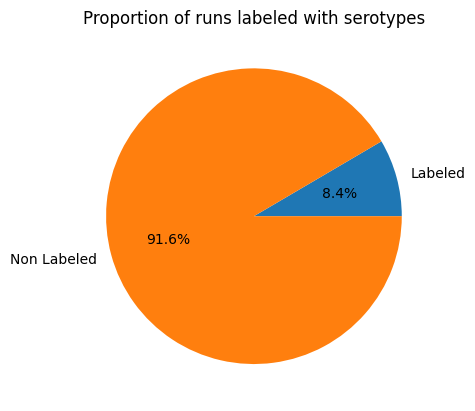

In [111]:

labels = 'Labeled', 'Non Labeled'
sizes = [labeled_length, non_labeled_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of runs labeled with serotypes")

Text(0.5, 1.0, 'Proportion of data (in format .sra) labeled with serotypes')

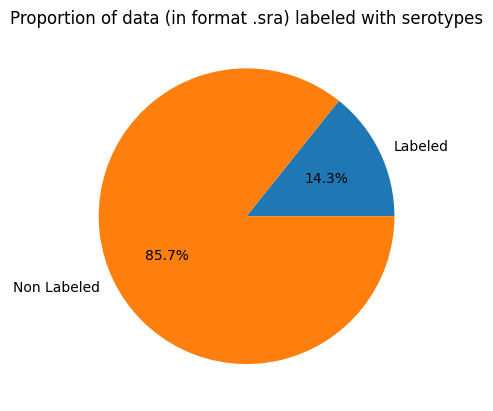

In [112]:
labels = 'Labeled', 'Non Labeled'
sizes = [sum(labeled["size_MB"]), sum(non_labeled["size_MB"])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (in format .sra) labeled with serotypes")


Text(0.5, 1.0, 'Proportion of runs labeled with each serotypes')

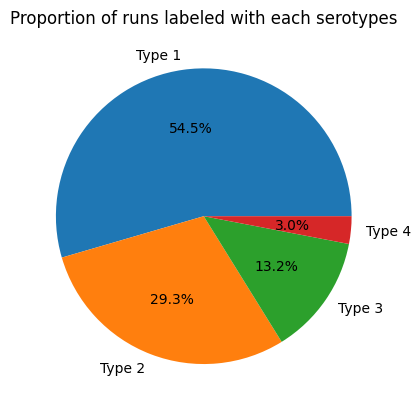

In [113]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [type1_length, type2_length, type3_length, type4_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of runs labeled with each serotypes")

Text(0.5, 1.0, 'Proportion of data (.sra) labeled with each serotypes')

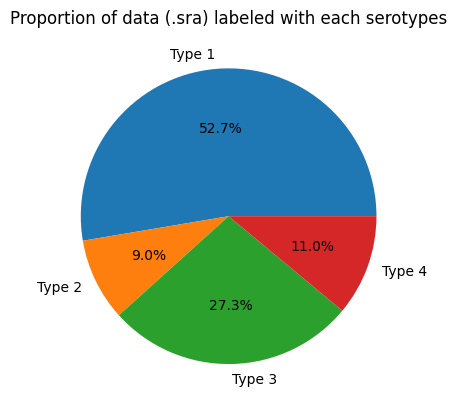

In [114]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [sum(type1["size_MB"])/1000, sum(type2["size_MB"])/1000, sum(type3["size_MB"])/1000, sum(type4["size_MB"])/1000]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (.sra) labeled with each serotypes")

# Characterizing  the data

Note that some fields (eg. Sex,Disease,Affection_Status,Histological_Type,Body_Site) are empty for all entries.

## Strategies (LibraryStrategy header)

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# STEP 0: Make sure you have these five real DataFrames in your namespace:
#         labeled, type1, type2, type3, type4
#
# e.g.
#    labeled = pd.read_csv("labeled.csv")
#    type1   = pd.read_csv("type1.csv")
#    … etc …
# -----------------------------------------------------------------------------

# Bundle them into lists so the function itself never needs more arguments
_TYPE_DFS    = [type1, type2, type3, type4]
_TYPE_LABELS = ["Type 1",    "Type 2",    "Type 3",    "Type 4"]
_COLORS      = ['r',         'b',         'y',         'g']

def plot_by_column(col):
    """
    Plots a stacked bar chart of the counts of each distinct value in
    `labeled[col]` across the four DataFrames type1..type4.

    Only argument:
      col (str): the column name to inspect in all five DataFrames.
    """
    # 1) Get the list of categories from the reference DataFrame
    cats = labeled[col].dropna().unique()

    # 2) We'll stack bars on top of each other:
    bottom = np.zeros(len(cats), dtype=int)

    # 3) For each of the type‐DataFrames compute counts & draw its layer
    for df, lbl, color in zip(_TYPE_DFS, _TYPE_LABELS, _COLORS):
        # value_counts() → Series indexed by category
        vc = df[col].value_counts().reindex(cats, fill_value=0)
        counts = vc.values

        plt.bar(cats, counts, bottom=bottom, color=color, label=lbl)
        bottom += counts

    # 4) Finalize
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Stacked counts of '{col}' by type")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Strategies used (whole dataset)')

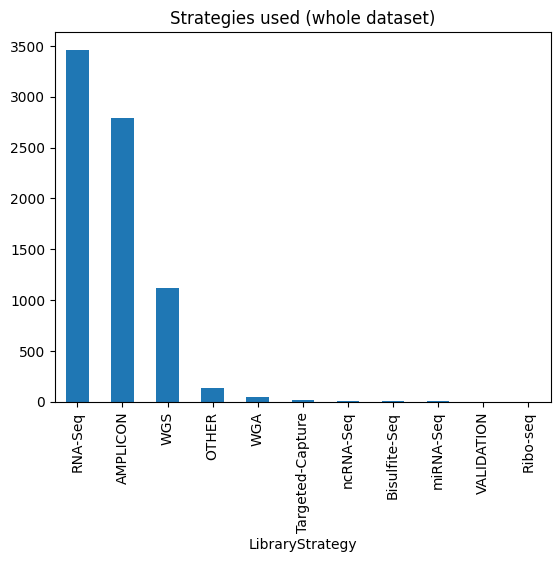

In [116]:
dataset["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (whole dataset)")

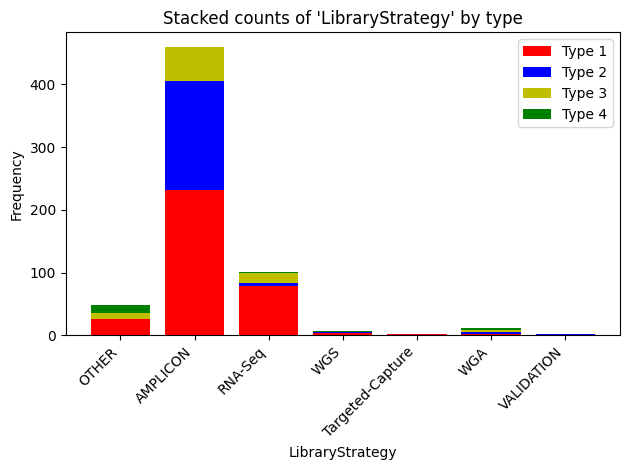

In [117]:
plot_by_column("LibraryStrategy")


Text(0.5, 1.0, 'Strategies used (type 4 only, for visibility)')

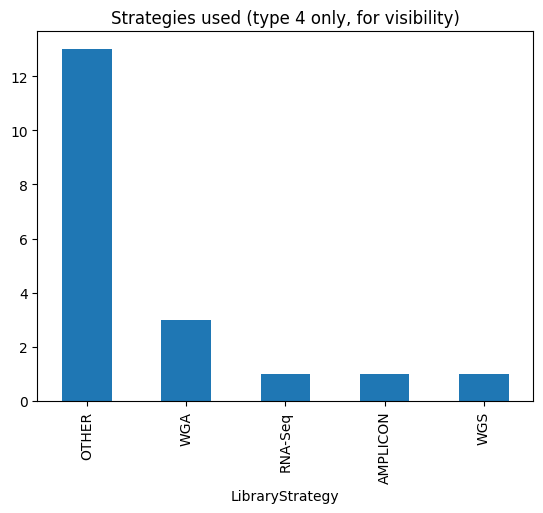

In [118]:
type4["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (type 4 only, for visibility)")

## Source (LibrarySource header)

Text(0.5, 1.0, 'Sources used (whole dataset)')

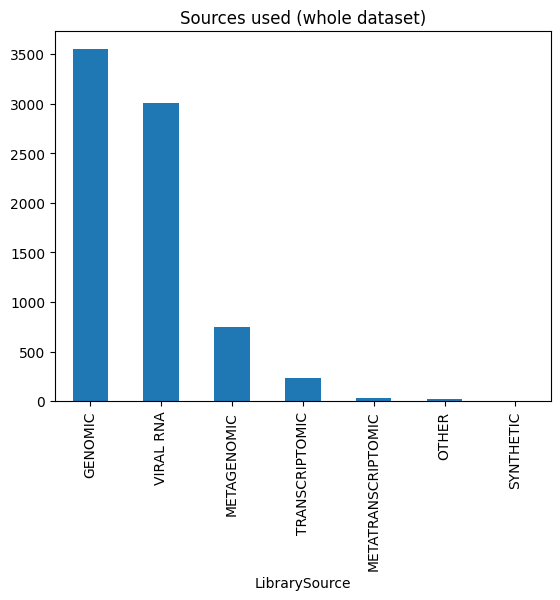

In [119]:
dataset["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (whole dataset)")

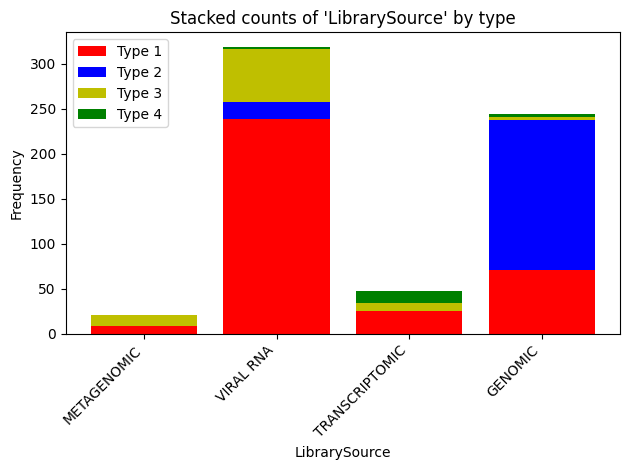

In [120]:
plot_by_column("LibrarySource")

Text(0.5, 1.0, 'Sources used (type 4 only, for visibility)')

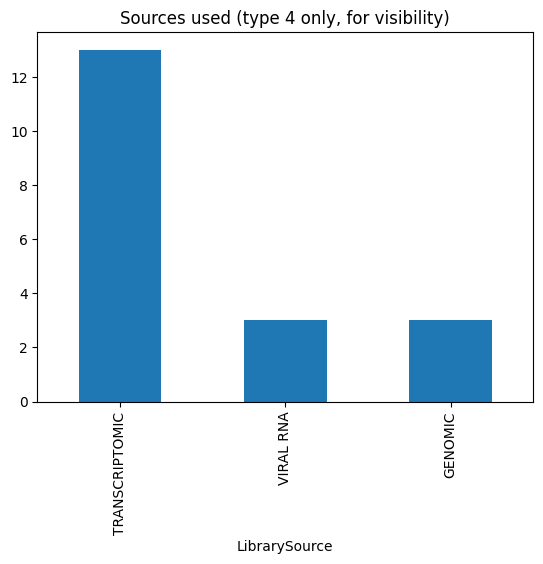

In [121]:
type4["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (type 4 only, for visibility)")

## Selection (LibrarySelection header)

Text(0.5, 1.0, 'Selections used (whole dataset)')

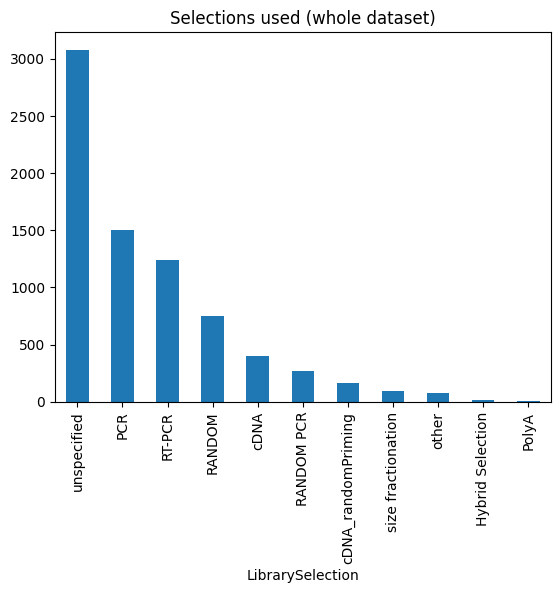

In [122]:
dataset["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (whole dataset)")

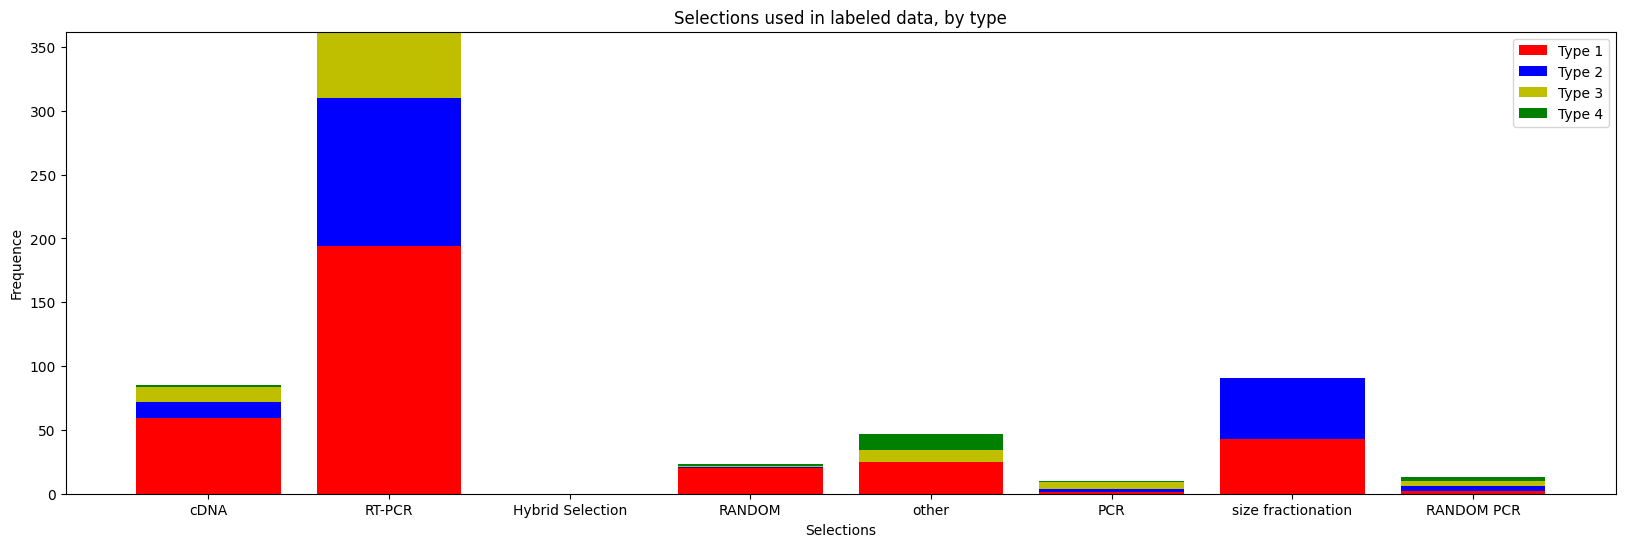

In [123]:
distinctSelections = labeled["LibrarySelection"].unique()
type1_selections = np.array([type1[type1.LibrarySelection == i].shape[0] for i in distinctSelections])
type2_selections = np.array([type2[type2.LibrarySelection == i].shape[0] for i in distinctSelections])
type3_selections = np.array([type3[type3.LibrarySelection == i].shape[0] for i in distinctSelections])
type4_selections = np.array([type4[type4.LibrarySelection == i].shape[0] for i in distinctSelections])

plt.figure(figsize=(20, 6))
plt.bar(distinctSelections, type1_selections, color='r')
plt.bar(distinctSelections, type2_selections, bottom=type1_selections, color='b')
plt.bar(distinctSelections, type3_selections, bottom=type1_selections + type2_selections, color='y')
plt.bar(distinctSelections, type4_selections, bottom=type1_selections + type2_selections + type3_selections, color='g')
plt.xlabel("Selections")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Selections used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Selections used (type 4 only for visibility)')

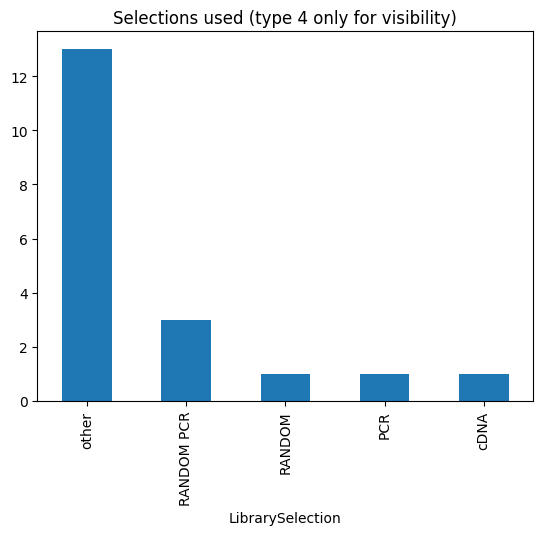

In [124]:
type4["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (type 4 only for visibility)")

## Models of the sequencers (Model header)

Text(0.5, 1.0, 'Platforms used (whole dataset)')

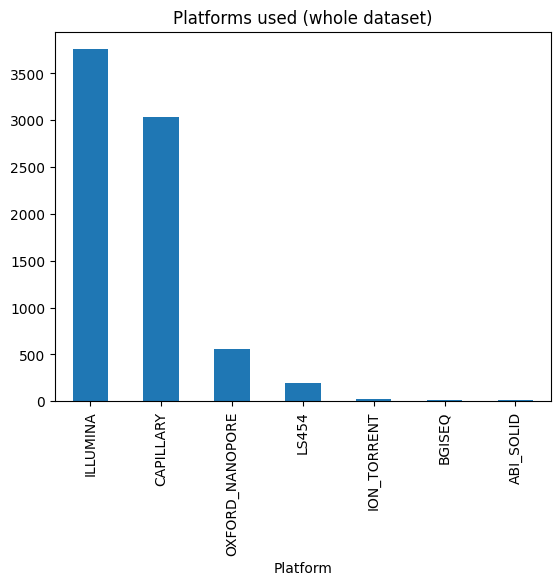

In [125]:
dataset["Platform"].value_counts().plot(kind = 'bar')
plt.title("Platforms used (whole dataset)")

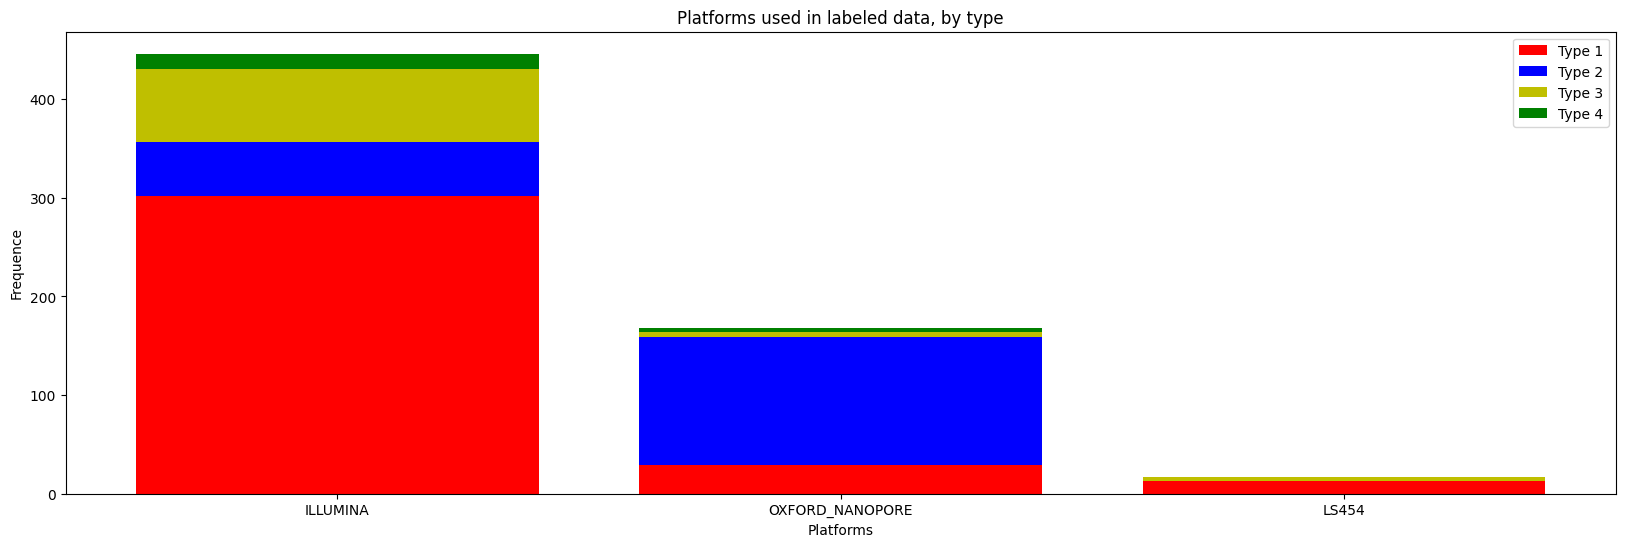

In [126]:
distinctPlatforms = labeled["Platform"].unique()
type1_platforms = np.array([type1[type1.Platform == i].shape[0] for i in distinctPlatforms])
type2_platforms = np.array([type2[type2.Platform == i].shape[0] for i in distinctPlatforms])
type3_platforms = np.array([type3[type3.Platform == i].shape[0] for i in distinctPlatforms])
type4_platforms = np.array([type4[type4.Platform == i].shape[0] for i in distinctPlatforms])

plt.figure(figsize=(20, 6))
plt.bar(distinctPlatforms, type1_platforms, color='r')
plt.bar(distinctPlatforms, type2_platforms, bottom=type1_platforms, color='b')
plt.bar(distinctPlatforms, type3_platforms, bottom=type1_platforms + type2_platforms, color='y')
plt.bar(distinctPlatforms, type4_platforms, bottom=type1_platforms + type2_platforms + type3_platforms, color='g')
plt.xlabel("Platforms")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Platforms used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (whole dataset)')

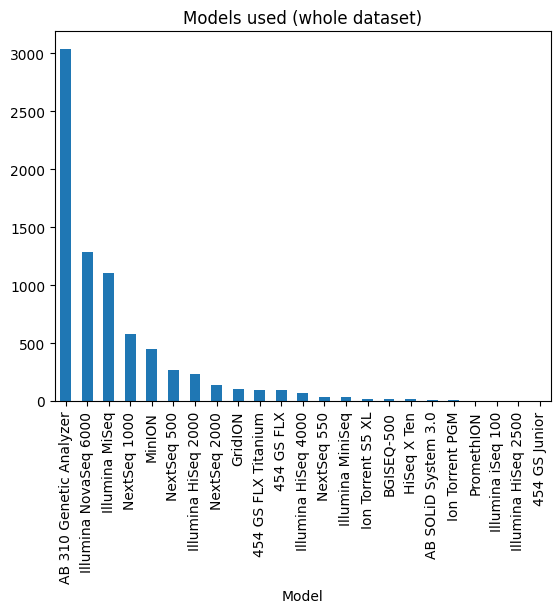

In [127]:
dataset["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (whole dataset)")

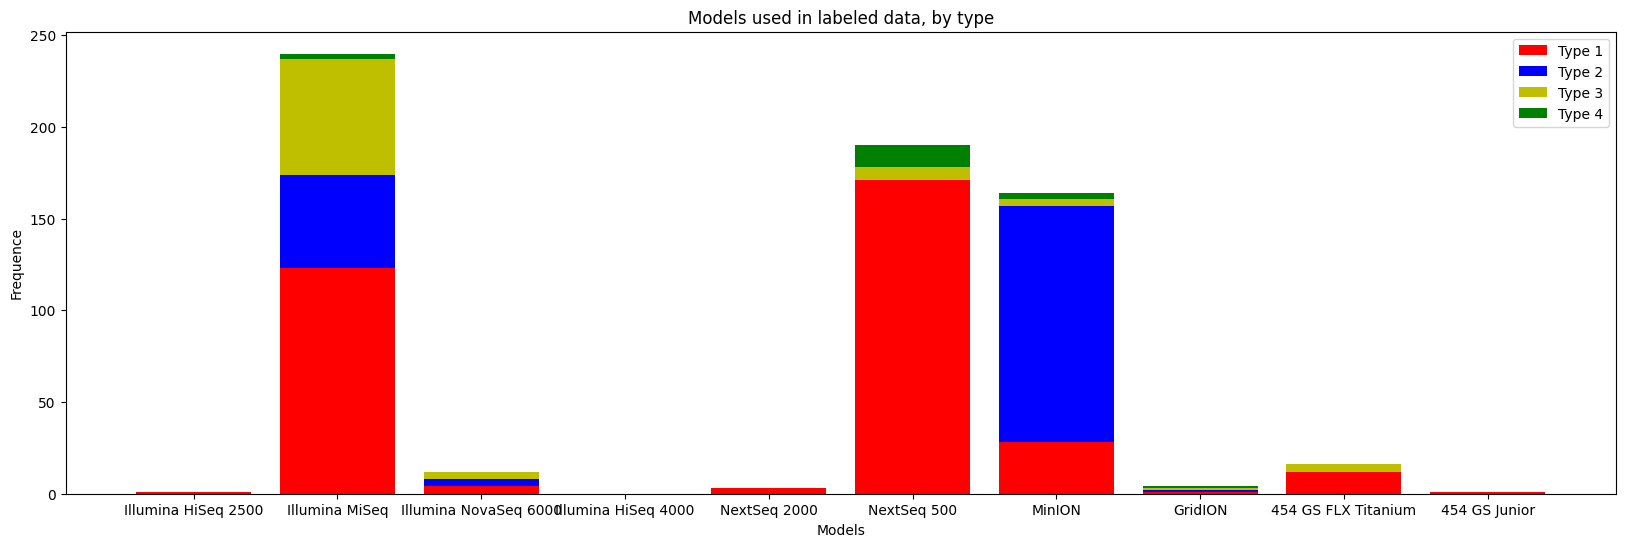

In [128]:
distinctModels = labeled["Model"].unique()
type1_models = np.array([type1[type1.Model == i].shape[0] for i in distinctModels])
type2_models = np.array([type2[type2.Model == i].shape[0] for i in distinctModels])
type3_models = np.array([type3[type3.Model == i].shape[0] for i in distinctModels])
type4_models = np.array([type4[type4.Model == i].shape[0] for i in distinctModels])

plt.figure(figsize=(20, 6))
plt.bar(distinctModels, type1_models, color='r')
plt.bar(distinctModels, type2_models, bottom=type1_models, color='b')
plt.bar(distinctModels, type3_models, bottom=type1_models + type2_models, color='y')
plt.bar(distinctModels, type4_models, bottom=type1_models + type2_models + type3_models, color='g')
plt.xlabel("Models")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Models used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (type 4 only, for visibility)')

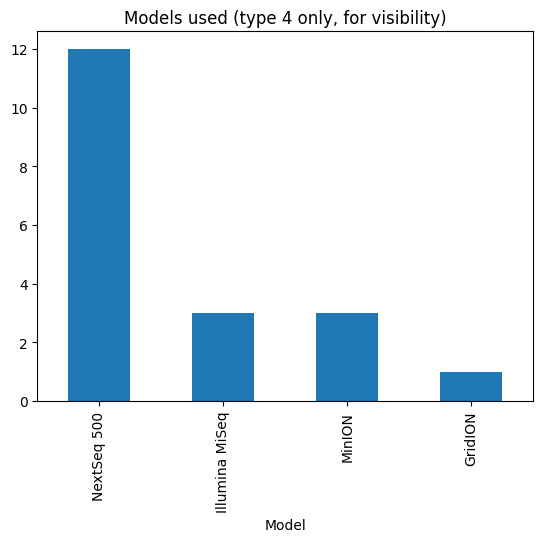

In [129]:
type4["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (type 4 only, for visibility)")

In [130]:
dataset["Run"].value_counts() # Looks fine

Run
SRR18911350    1
SRR8334941     1
SRR1056508     1
SRR1056481     1
SRR1056497     1
              ..
SRR1056543     1
SRR1056509     1
SRR1056500     1
SRR1056460     1
SRR1056518     1
Name: count, Length: 7598, dtype: int64

## avgLength and size_MB

Text(0.5, 0, 'avgLength')

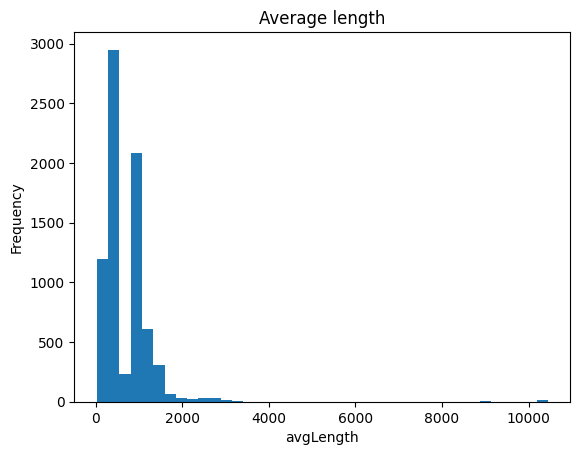

In [131]:
plt.hist(dataset["avgLength"], 40)
dataset.nlargest(10, ["avgLength"])
plt.title("Average length")
plt.ylabel("Frequency")
plt.xlabel("avgLength")

Text(0.5, 0, 'size_MB')

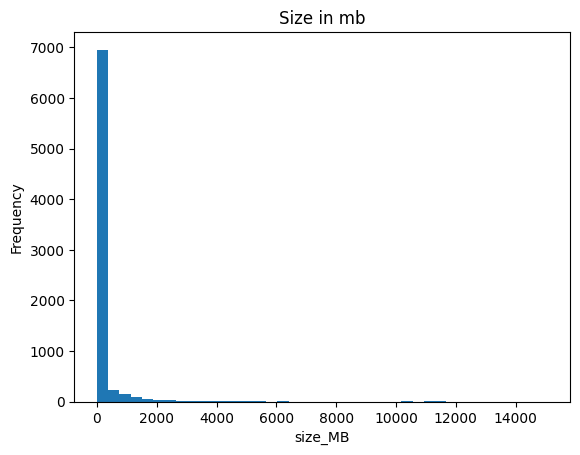

In [132]:
plt.hist(dataset["size_MB"], 40)
dataset.nlargest(10, ["size_MB"])
plt.title("Size in mb")
plt.ylabel("Frequency")
plt.xlabel("size_MB")

## TaxID

Text(0, 0.5, 'Frequency')

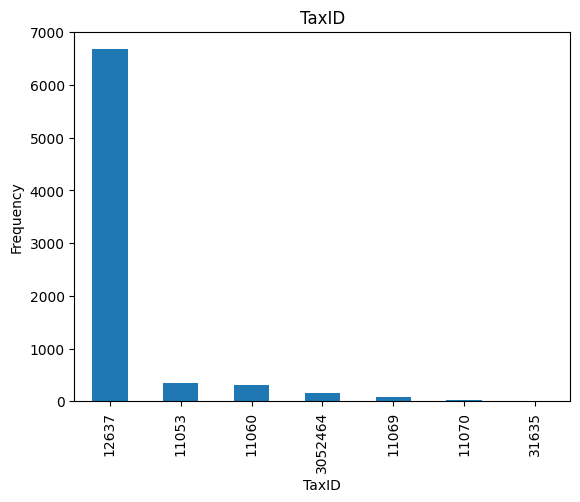

In [133]:
dataset["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

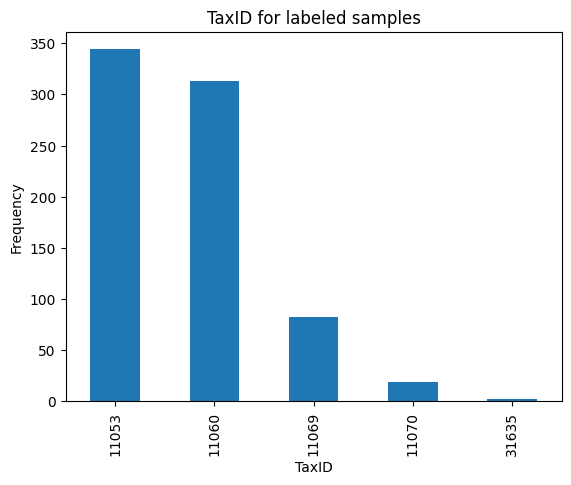

In [134]:
labeled["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID for labeled samples")
plt.ylabel("Frequency")

In [135]:
print("TaxID for type 1")
print(type1["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 2")
print(type2["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 3")
print(type3["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 4")
print(type4["TaxID"].value_counts())


TaxID for type 1
TaxID
11053    344
Name: count, dtype: int64
-------------------
TaxID for type 2
TaxID
11060    183
31635      2
Name: count, dtype: int64
-------------------
TaxID for type 3
TaxID
11069    83
Name: count, dtype: int64
-------------------
TaxID for type 4
TaxID
11070    19
Name: count, dtype: int64


## SampleType, Sample, BioSample

In [136]:
dataset["SampleType"].value_counts()

SampleType
simple    7598
Name: count, dtype: int64

In [137]:
print("Sample in all data")
print(dataset["Sample"].value_counts())
print("------------------")
print("Sample in labeled data")
print(labeled["Sample"].value_counts())

Sample in all data
Sample
SRS5003210     3038
SRS1158575       38
SRS1443398       21
SRS1443388       13
SRS3276199       11
               ... 
SRS20359892       1
SRS20359891       1
SRS20360136       1
SRS20359920       1
SRS20360139       1
Name: count, Length: 4213, dtype: int64
------------------
Sample in labeled data
Sample
SRS1443398     21
SRS1443388     13
SRS1443395     11
SRS1443408     10
SRS1443393      7
               ..
ERS17649287     1
ERS17649288     1
ERS17649289     1
ERS17649290     1
DRS074411       1
Name: count, Length: 613, dtype: int64


All samples are distinct in labeled data.


In [138]:
print("BioSample in all data")
print(dataset["BioSample"].value_counts())
print("------------------")
print("BioSample in labeled data")
print(labeled["BioSample"].value_counts()) # Is the same as before, see below

BioSample in all data
BioSample
SAMN12110434    3038
SAMN04254732      38
SAMN05006908      21
SAMN05006905      13
SAMN09099008      11
                ... 
SAMN39748910       1
SAMN39748909       1
SAMN39749130       1
SAMN39748960       1
SAMN39749132       1
Name: count, Length: 4213, dtype: int64
------------------
BioSample in labeled data
BioSample
SAMN05006908      21
SAMN05006905      13
SAMN05006907      11
SAMN05006909      10
SAMN05006906       7
                  ..
SAMEA115066107     1
SAMEA115066108     1
SAMEA115066109     1
SAMEA115066110     1
SAMD00057808       1
Name: count, Length: 613, dtype: int64


In [139]:
hashmap = {}

for i in range(5000):
    hashmap[dataset["Sample"][i]] = dataset["BioSample"][i]

is_equal = True

for i in range(5000):
    if(hashmap[dataset["Sample"][i]] != dataset["BioSample"][i]):
        is_equal = False

if(is_equal):
    print("There is a one to one correspondence between BioSample and Sample fields")
else:
    print("Warning: there is no correspondence between BioSample and Sample fields")

There is a one to one correspondence between BioSample and Sample fields


# BioProject, SRAStudy

In [140]:
print("BioProject in all data")
print(dataset["BioProject"].value_counts())
print("------------------")
print("BioProject in labeled data")
print(labeled["BioProject"].value_counts())

BioProject in all data
BioProject
PRJNA1072696    596
PRJNA973096     460
PRJNA951702     345
PRJNA31235      278
PRJNA1045842    246
               ... 
PRJNA1118487      1
PRJNA765316       1
PRJNA488494       1
PRJNA1216219      1
PRJNA477922       1
Name: count, Length: 112, dtype: int64
------------------
BioProject in labeled data
BioProject
PRJNA1212489    139
PRJNA321963      78
PRJNA814204      72
PRJEB71472       65
PRJNA449278      54
PRJNA811700      44
PRJNA31235       43
PRJNA417011      34
PRJDB5114        26
PRJNA1009983     25
PRJNA606238      20
PRJNA662334      17
PRJNA725703      16
PRJNA431306      15
PRJNA382618      15
PRJNA1152295     13
PRJEB11280       13
PRJEB89228       12
PRJNA941915      12
PRJNA1242886     11
PRJNA61367        8
PRJNA1005611      7
PRJNA494391       4
PRJNA1118493      3
PRJNA979106       3
PRJNA493303       2
PRJEB66350        2
PRJNA474413       2
PRJNA575805       2
PRJNA344504       1
PRJNA488494       1
PRJNA1052714      1
PRJNA11184

In [141]:
print("SRAStudy in all data")
print(dataset["SRAStudy"].value_counts())
print("------------------")
print("SRAStudy in labeled data")
print(labeled["SRAStudy"].value_counts()) # The 2786 samples with SRAStudy SRP202294 have an empty BioProject field, see below


SRAStudy in all data
SRAStudy
SRP202294    3038
SRP487774     596
SRP450554     460
SRP430629     345
SRP014724     278
             ... 
SRP510973       1
SRP338207       1
SRP159163       1
SRP560131       1
SRP151336       1
Name: count, Length: 113, dtype: int64
------------------
SRAStudy in labeled data
SRAStudy
SRP565854    139
SRP075335     78
SRP363178     72
ERP156272     65
SRP139005     54
SRP362090     44
SRP014724     43
SRP123568     34
DRP004410     26
SRP457181     25
SRP248407     20
SRP281234     17
SRP316685     16
SRP167398     15
SRP103648     15
SRP528548     13
ERP012644     13
ERP172269     12
SRP425958     12
SRP573686     11
SRP007368      8
SRP455139      7
SRP163225      4
SRP510978      3
SRP440819      3
SRP162880      2
ERP151415      2
SRP149651      2
SRP224336      2
SRP108434      1
SRP159163      1
SRP497892      1
SRP510973      1
Name: count, dtype: int64


In [142]:
hashmap = {}

for i in range(5000):
    hashmap[dataset["SRAStudy"][i]] = str(dataset["BioProject"][i]) # The str fonction is there to handle empty headers correctly

is_equal = True

for i in range(5000):
    if(hashmap[dataset["SRAStudy"][i]] != str(dataset["BioProject"][i])): 
        is_equal = False

if(is_equal):
    print("There is a one to one correspondence between BioProject and SRAStudy fields")
else:
    print("Warning: there is no correspondence between BioProject and SRAStudy fields")

There is a one to one correspondence between BioProject and SRAStudy fields


In [143]:
studyCounts = dataset["SRAStudy"].value_counts()
studyCounts.nlargest(20)

SRAStudy
SRP202294    3038
SRP487774     596
SRP450554     460
SRP430629     345
SRP014724     278
SRP474537     246
SRP518091     166
SRP572645     161
SRP565854     139
SRP567982     129
SRP457181     127
SRP452979     127
SRP426010     126
SRP487343     112
SRP111739     106
SRP075335      78
SRP363178      72
SRP515072      65
SRP345689      65
ERP156272      65
Name: count, dtype: int64

A quick breakdown of all studies with more than 100 samples:


In [144]:
plus100_samples = np.unique(np.array([elt for elt in dataset["SRAStudy"] if studyCounts[elt]>=100]))

def characterizeStudy(studyname): # Given an SRAStudy value, gives (almost) all information about that study
    print("Data for SRAStudy " + str(i) + " : ")
    filtered_dataset = dataset[dataset.SRAStudy == studyname]
    print(" - Center name(s): ", end = '')
    for a in np.unique(filtered_dataset["CenterName"]):
        print(a + ", ", end = '')
    print("")
    print(" - Number of runs: " + str(studyCounts[studyname]))
    print(" - Total size (in Gb): " + str(sum(filtered_dataset["size_MB"])/1000))
    print(" - Average of avgLength: " + str(np.mean(filtered_dataset["avgLength"])))
    print(" - Scientific names used: ", end = '')
    for a in np.unique(filtered_dataset["ScientificName"]):
        print(a + ", ", end = '')
    print("")
    print(" - Strategies used: ", end = '')
    for a in np.unique(filtered_dataset["LibraryStrategy"]):
        print(a + ", ", end = '')
    print("")
    print(" - Selections used: ", end = '')
    for a in np.unique(filtered_dataset["LibrarySelection"]):
        print(a + ", ", end = '')
    print("")
    print(" - Sources used: ", end = '')
    for a in np.unique(filtered_dataset["LibrarySource"]):
        print(a + ", ", end = '')
    print("")
    print(" - Platforms used: ", end = '')
    for a in np.unique(filtered_dataset["Platform"]):
        print(a + ", ", end = '')
    print("")
    print(" - Models used: ", end = '')
    for a in np.unique(filtered_dataset["Model"]):
        print(a + ", ", end = '')
    print("")
    print("---------------------------------")

for i in plus100_samples:
    characterizeStudy(i)
    

Data for SRAStudy SRP014724 : 
 - Center name(s): BI, 
 - Number of runs: 278
 - Total size (in Gb): 2.087
 - Average of avgLength: 381.6474820143885
 - Scientific names used: Dengue virus, Dengue virus type 2, 
 - Strategies used: AMPLICON, WGS, 
 - Selections used: RANDOM PCR, RT-PCR, 
 - Sources used: GENOMIC, VIRAL RNA, 
 - Platforms used: ILLUMINA, LS454, 
 - Models used: 454 GS FLX, 454 GS FLX Titanium, Illumina MiSeq, 
---------------------------------
Data for SRAStudy SRP111739 : 
 - Center name(s): UNIVERSITY OF CALIFORNIA, BERKELEY, 
 - Number of runs: 106
 - Total size (in Gb): 49.794
 - Average of avgLength: 300.0
 - Scientific names used: Dengue virus, 
 - Strategies used: AMPLICON, 
 - Selections used: RT-PCR, 
 - Sources used: VIRAL RNA, 
 - Platforms used: ILLUMINA, 
 - Models used: Illumina HiSeq 2000, 
---------------------------------
Data for SRAStudy SRP202294 : 
 - Center name(s): BI, 
 - Number of runs: 3038
 - Total size (in Gb): 23.732
 - Average of avgLength: